In [1]:
import pandas as pd
import numpy as np

In [2]:
date = "2018-04-06"
event_csvPath = "/Users/chuamelia/Google Drive/Forecasting Time Series/citi-bike/ts-realtime-analysis-bike/event_csv/{0}.csv".format(date)

In [3]:
status = pd.read_csv(event_csvPath, low_memory=False)

In [6]:
status = status[["last_updated","station_id","num_bikes_available"]]

In [7]:
status_161 = status[status["station_id"]==161]

In [9]:
status_161["last_updated"] = pd.to_datetime(status_161["last_updated"], unit='s')

/Users/chuamelia/anaconda/envs/py35/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
status_161Path = "/Users/chuamelia/Google Drive/Forecasting Time Series/citi-bike/ts-realtime-analysis-bike/event_csv/status_161.csv"
status_161.to_csv(status_161Path, sep=",",index=False)

In [13]:
status_161.sort_values(["last_updated"]).head(5)

,last_updated,station_id,num_bikes_available
15,2018-04-07 01:10:48,161,28
828,2018-04-07 01:31:44,161,28
1641,2018-04-07 01:32:57,161,30
2454,2018-04-07 01:33:51,161,30
3267,2018-04-07 01:34:54,161,30


In [28]:
dta = status_161[["last_updated","num_bikes_available"]]
dta.index = pd.DatetimeIndex(status_161["last_updated"].values)
del dta["last_updated"]

In [30]:
dta.head(5)

,num_bikes_available
2018-04-07 01:10:48,28
2018-04-07 01:31:44,28
2018-04-07 01:32:57,30
2018-04-07 01:33:51,30
2018-04-07 01:34:54,30


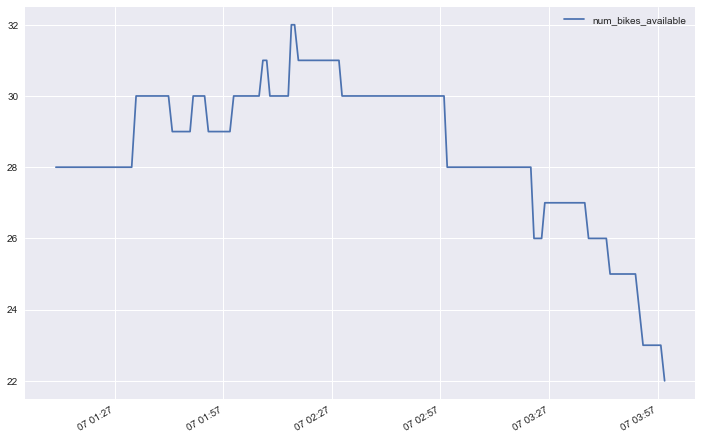

In [31]:
dta.plot(figsize=(12,8));

In [33]:
print('Importing relevant libraries')

%matplotlib inline


import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm

Importing relevant libraries


/Users/chuamelia/anaconda/envs/py35/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


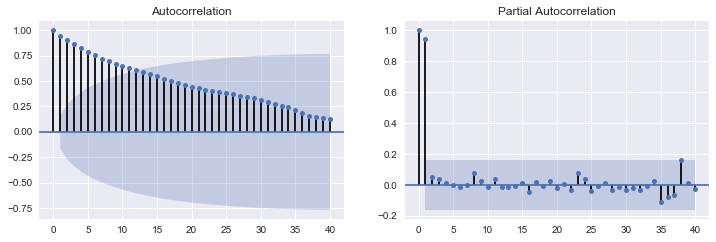

In [34]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(221)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(222)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)